Después de ver los archivos en https://covidtracking.com/data/api descargo daily.scv y daily.json

**Exploración inicial de los datos:**

* Revisar las primeras filas para tener una idea general del contenido y estructura del DataFrame.

* Analizar los tipos de datos de cada columna y ver si necesitan alguna transformación.

* Identificar las columnas más relevantes para el análisis.

In [ ]:
import pandas as pd

#  Leyendo el archivo CSV
df = pd.read_csv("daily.csv")

# Veo información de la tabla

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [ ]:
# veo las cinco primeras filas de la tabla
df.head()

date state  positive  probableCases  negative  pending  \
20451 2020-03-06    AK       NaN            NaN       NaN      1.0   
20400 2020-03-07    AK       NaN            NaN       NaN      2.0   
20349 2020-03-08    AK       NaN            NaN       NaN      6.0   
20298 2020-03-09    AK       NaN            NaN       NaN      9.0   
20247 2020-03-10    AK       NaN            NaN       NaN      9.0   

      totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
20451        totalTestsViral               8.0                    NaN   
20400        totalTestsViral              12.0                    NaN   
20349        totalTestsViral              14.0                    NaN   
20298        totalTestsViral              23.0                    NaN   
20247        totalTestsViral              23.0                    NaN   

       hospitalizedCumulative  ...  deathIncrease  hospitalizedIncrease  \
20451                     NaN  ...              0                     0   
20400                     NaN  ...              0                     0   
20349                     NaN  ...              0                     0   
20298                     1.0  ...              0                     1   
20247                     1.0  ...              0                     0   

                                           hash  commercialScore  \
20451  a342f77e8bb779edc91c9e1a1be309cd4338356b                0   
20400  7162c5ea37dd3e1693bfb3c2b9e97fe5e518755d                0   
20349  c90ce1a21475c44727e5853c22c009321728270c                0   
20298  e5fdecc645ef8aa383bb58cae9bdaf905ab33583                0   
20247  41ecc8af507387301652e0bb695c90af3caca45d                0   

       negativeRegularScore negativeScore positiveScore score  grade  \
20451                     0             0             0     0    NaN   
20400                     0             0             0     0    NaN   
20349                     0             0             0     0    NaN   
20298                     0             0             0     0    NaN   
20247                     0             0             0     0    NaN   

       growth_rate  
20451          NaN  
20400          NaN  
20349          NaN  
20298          NaN  
20247          NaN  

[5 rows x 57 columns]

In [ ]:
# ... y las cinco últimas (por si abajo hay totales o algo similar)
df.tail()

date state  positive  probableCases  negative  pending  \
279 2021-03-03    WY   54616.0         8348.0  181681.0      NaN   
223 2021-03-04    WY   54685.0         8357.0  181957.0      NaN   
167 2021-03-05    WY   54764.0         8367.0  182264.0      NaN   
111 2021-03-06    WY   54764.0         8367.0  182264.0      NaN   
55  2021-03-07    WY   54764.0         8367.0  182264.0      NaN   

    totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
279        totalTestsViral          643476.0                   24.0   
223        totalTestsViral          646179.0                   23.0   
167        totalTestsViral          649293.0                   21.0   
111        totalTestsViral          649293.0                   21.0   
55         totalTestsViral          649293.0                   21.0   

     hospitalizedCumulative  ...  deathIncrease  hospitalizedIncrease  \
279                  1388.0  ...              0                     3   
223                  1389.0  ...              0                     1   
167                  1391.0  ...              0                     2   
111                  1391.0  ...              0                     0   
55                   1391.0  ...              0                     0   

                                         hash  commercialScore  \
279  716c8498948f8b7ab25227b0beb294adcacf307a                0   
223  bafad46ba8420fbbba342b4739be877ac62c0050                0   
167  0bb724dd37746ba6f6cf1a322600bb0cd13b4d98                0   
111  1c663524ab25a7f876788a0a2e4dc12a0026ecbd                0   
55   9cbc8bdcabbaf1f301ec1e48f8c23a4c65753282                0   

     negativeRegularScore negativeScore positiveScore score  grade  \
279                     0             0             0     0    NaN   
223                     0             0             0     0    NaN   
167                     0             0             0     0    NaN   
111                     0             0             0     0    NaN   
55                      0             0             0     0    NaN   

     growth_rate  
279     0.001632  
223     0.001263  
167     0.001445  
111     0.000000  
55      0.000000  

[5 rows x 57 columns]

## Análisis de variables clave

<ipython-input-7-921ce0fc3f39>:12: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in Series.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['tasa_crecimiento'] = df['positive'].pct_change(fill_method='bfill')  # Usar 'bfill' para rellenar valores faltantes
<ipython-input-7-921ce0fc3f39>:42: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in Series.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['tasa_crecimiento'] = df['positive'].pct_change(fill_method='bfill')


Tasa de positividad promedio: inf%
Tasa de crecimiento promedio: inf


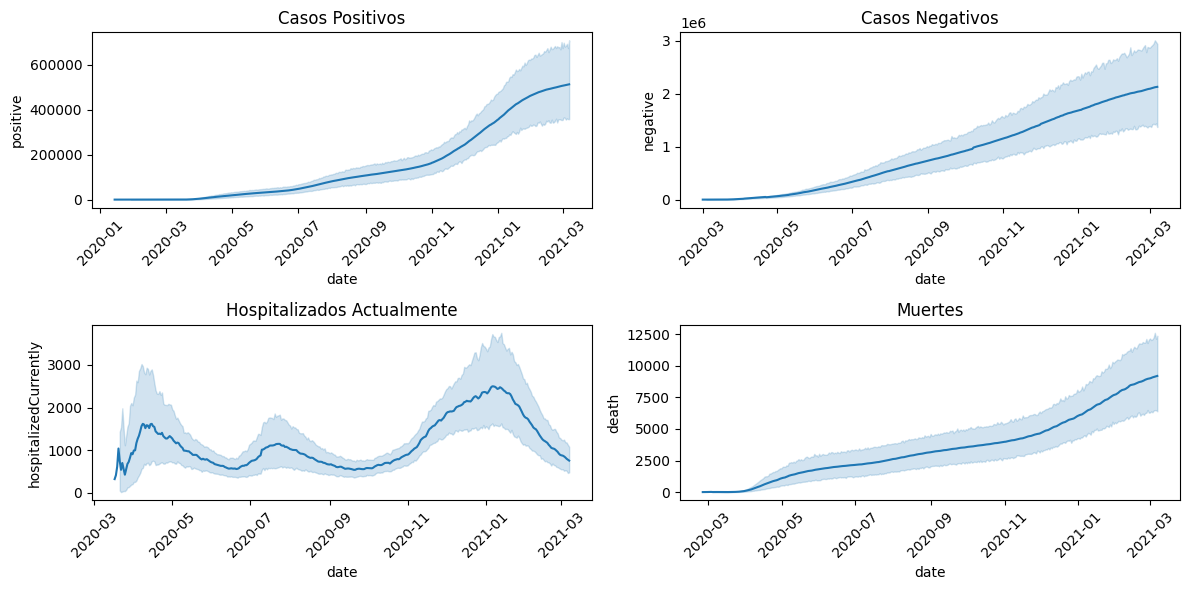

In [7]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('daily.csv')

# Limpiar y preparar los datos
df = df.dropna(subset=['positive'])  # Eliminar filas con valores faltantes en 'positive'
df['tasa_positividad'] = df['positive'] / df['totalTestResults']
df['tasa_crecimiento'] = df['positive'].pct_change(fill_method='bfill')  # Usar 'bfill' para rellenar valores faltantes

# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Examinar la evolución de los casos positivos, negativos, hospitalizados y muertes
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='positive', data=df)
plt.title('Casos Positivos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la visualización

plt.subplot(2, 2, 2)
sns.lineplot(x='date', y='negative', data=df)
plt.title('Casos Negativos')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.lineplot(x='date', y='hospitalizedCurrently', data=df)
plt.title('Hospitalizados Actualmente')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.lineplot(x='date', y='death', data=df)
plt.title('Muertes')
plt.xticks(rotation=45)
plt.tight_layout()

# Calcular métricas relevantes
df['tasa_positividad'] = df['positive'] / df['totalTestResults']
df['tasa_crecimiento'] = df['positive'].pct_change(fill_method='bfill')

print(f"Tasa de positividad promedio: {df['tasa_positividad'].mean():.2%}")
print(f"Tasa de crecimiento promedio: {df['tasa_crecimiento'].mean():.2f}")

## Exploración de relaciones y correlaciones

Coeficiente de correlación: 0.72


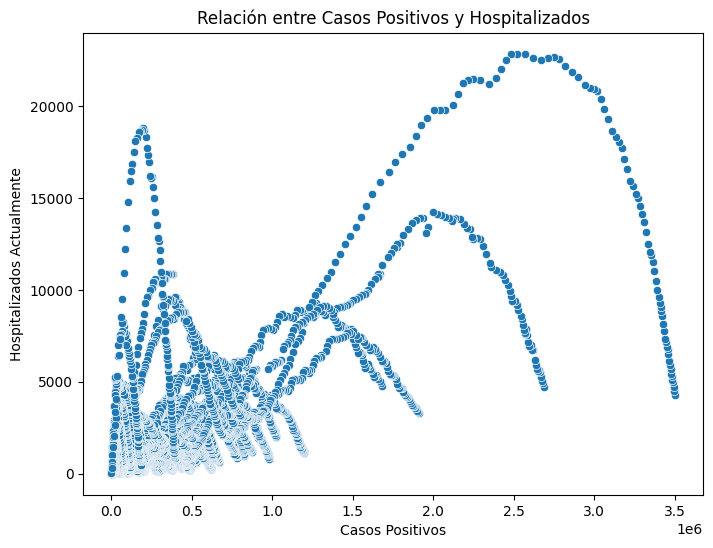

In [8]:
# Analizar la relación entre casos positivos y hospitalizados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='positive', y='hospitalizedCurrently', data=df)
plt.xlabel('Casos Positivos')
plt.ylabel('Hospitalizados Actualmente')
plt.title('Relación entre Casos Positivos y Hospitalizados')

# Calcular el coeficiente de correlación
corr = df[['positive', 'hospitalizedCurrently']].corr()
print(f"Coeficiente de correlación: {corr.iloc[0, 1]:.2f}")

El coeficiente de correlación de 0.72 indica que existe una correlación positiva moderadamente fuerte entre estas dos variables.
Algunos puntos clave para interpretar la gráfica:

La tendencia general es que a medida que aumentan los casos positivos, también aumenta el número de hospitalizados. Esto se puede ver en la forma de nube de puntos que se extiende de la esquina inferior izquierda a la superior derecha.
Hay momentos en los que el número de hospitalizados es relativamente bajo en comparación con los casos positivos. Esto puede indicar cambios en la gravedad de la enfermedad o mejoras en el tratamiento a lo largo del tiempo.
Hacia la derecha de la gráfica, se observa una especie de "techo" donde el número de hospitalizados parece alcanzar un máximo, incluso cuando los casos positivos siguen aumentando. Esto puede reflejar limitaciones en la capacidad del sistema de salud.
La dispersión de los puntos también sugiere que, si bien hay una relación positiva general, existen otros factores que pueden influir en la tasa de hospitalización, como la edad de los pacientes, comorbilidades, etc.

En resumen, esta gráfica nos permite visualizar y cuantificar la estrecha relación entre el número de casos positivos y el número de hospitalizados por COVID-19. Esto puede ser muy útil para anticipar la demanda de servicios de salud y planificar adecuadamente los recursos.

# Visualización de datos
Incluyo algunas gráficas.

In [11]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral4
from bokeh.layouts import layout
from bokeh.io import push_notebook

# Activar la salida en el notebook
output_notebook()

# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Seleccionar algunos estados para la comparación
states_to_plot = ['NY', 'CA', 'TX', 'FL']

# Filtrar los datos para los estados seleccionados
filtered_data = df[df['state'].isin(states_to_plot)]

# Agrupar por estado y fecha, luego sumar los casos positivos
state_time_series = filtered_data.groupby(['state', 'date'])['positive'].sum().reset_index()

# Crear la figura en Bokeh
p = figure(x_axis_type='datetime', width=800, height=400, title='Evolución de Casos Positivos Confirmados a lo Largo del Tiempo')
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Casos Positivos Confirmados'

# Añadir líneas y puntos para cada estado
for i, state in enumerate(states_to_plot):
    state_data = state_time_series[state_time_series['state'] == state]
    source = ColumnDataSource(state_data)
    p.line('date', 'positive', source=source, legend_label=state, color=Spectral4[i], line_width=2)

    # Usar scatter en lugar de circle
    p.scatter('date', 'positive', source=source, color=Spectral4[i], size=4)

# Añadir herramienta de hover
hover = HoverTool(
    tooltips=[
        ("Fecha", "@date{%F}"),
        ("Casos", "@positive{0,0}"),
        ("Estado", "@state")
    ],
    formatters={
        '@date': 'datetime',
        '@positive': 'numeral'
    },
    mode='vline'  # Esto hará que el hover se active cuando el cursor esté en la línea vertical
)
p.add_tools(hover)

# Configurar la leyenda
p.legend.title = 'Estado'
p.legend.location = 'top_left'

# Mostrar la gráfica interactiva
show(p)

In [12]:
import pandas as pd
import plotly.express as px

# Asumiendo que ya tienes el DataFrame 'df' con las columnas 'date', 'state', y 'positive'

# Calculamos la tasa de crecimiento
df = df.sort_values(['state', 'date'])
df['positive'] = df.groupby('state')['positive'].fillna(method='ffill')
df['growth_rate'] = df.groupby('state')['positive'].pct_change(fill_method=None)

# Creamos el gráfico con Plotly
fig = px.line(df, x='date', y='growth_rate', color='state',
              title='Tasa de Crecimiento Diario de Casos de COVID-19 por Estado')

# Personalizamos el tooltip
fig.update_traces(
    hovertemplate="<br>".join([
        "Fecha: %{x}",
        "Tasa de crecimiento: %{y:.2%}",
        "Estado: %{fullData.name}"
    ])
)

# Ajustamos el diseño
fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Tasa de Crecimiento",
    legend_title="Estado",
    hovermode="closest"
)

# Mostramos el gráfico
fig.show()

<ipython-input-12-f2b578f37e29>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['positive'] = df.groupby('state')['positive'].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


Viendo el gráfico, sería interesante el acotar las fechas para poder centrarse en los días en los que sube la tasa de crecimiento, por ejemplo, del 15 de febrero del 2020 al 01 de junio del 2020

In [14]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.palettes import Category20
from bokeh.layouts import column

# Calculamos la tasa de crecimiento
df = df.sort_values(['state', 'date'])
df['positive'] = df.groupby('state')['positive'].transform(lambda x: x.ffill())
df['growth_rate'] = df.groupby('state')['positive'].pct_change(fill_method=None)

# Creamos el gráfico
p = figure(x_axis_type="datetime", title="Tasa de Crecimiento Diario de Casos de COVID-19 por Estado",
           width=1000, height=600,
           x_range=(pd.Timestamp('2020-02-15'), pd.Timestamp('2020-05-30')))

# Definimos el HoverTool personalizado
hover = HoverTool(
    tooltips=[
        ('Fecha', '@date{%F}'),
        ('Tasa de crecimiento', '@growth_rate{0.2%}'),
        ('Estado', '@state'),
    ],
    formatters={
        '@date': 'datetime',
    },
    mode='vline'
)

p.add_tools(hover)

# Dibujamos una línea para cada estado
states = df['state'].unique()
colors = Category20[20]  # Bokeh color palette

for state, color in zip(states, colors):
    source = ColumnDataSource(df[df['state'] == state])
    p.line('date', 'growth_rate', source=source, line_color=color, legend_label=state)

# Configuramos la leyenda
p.legend.click_policy = "hide"
p.legend.location = "top_left"
p.legend.background_fill_alpha = 0.5

# Configuramos los ejes
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Tasa de Crecimiento'
p.yaxis.formatter = NumeralTickFormatter(format="0.0%")

# Mostramos el gráfico
show(column(p))

In [18]:
!pip install pandas geopandas plotly




In [20]:
#convertir columna de fecha a un datetime en lugar de un integer






# Convertir la columna original, puedes hacer:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d')

# Verificar el tipo de dato de la columna
print(df['date'].dtype)
df.head()
df.tail()

datetime64[ns]


date state  positive  probableCases  negative  pending  \
279 2021-03-03    WY   54616.0         8348.0  181681.0      NaN   
223 2021-03-04    WY   54685.0         8357.0  181957.0      NaN   
167 2021-03-05    WY   54764.0         8367.0  182264.0      NaN   
111 2021-03-06    WY   54764.0         8367.0  182264.0      NaN   
55  2021-03-07    WY   54764.0         8367.0  182264.0      NaN   

    totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
279        totalTestsViral          643476.0                   24.0   
223        totalTestsViral          646179.0                   23.0   
167        totalTestsViral          649293.0                   21.0   
111        totalTestsViral          649293.0                   21.0   
55         totalTestsViral          649293.0                   21.0   

     hospitalizedCumulative  ...                                      hash  \
279                  1388.0  ...  716c8498948f8b7ab25227b0beb294adcacf307a   
223                  1389.0  ...  bafad46ba8420fbbba342b4739be877ac62c0050   
167                  1391.0  ...  0bb724dd37746ba6f6cf1a322600bb0cd13b4d98   
111                  1391.0  ...  1c663524ab25a7f876788a0a2e4dc12a0026ecbd   
55                   1391.0  ...  9cbc8bdcabbaf1f301ec1e48f8c23a4c65753282   

     commercialScore  negativeRegularScore  negativeScore  positiveScore  \
279                0                     0              0              0   
223                0                     0              0              0   
167                0                     0              0              0   
111                0                     0              0              0   
55                 0                     0              0              0   

    score grade tasa_positividad  tasa_crecimiento  growth_rate  
279     0   NaN         0.084877         -0.587542     0.001632  
223     0   NaN         0.084628         -0.587834     0.001263  
167     0   NaN         0.084344         -0.588129     0.001445  
111     0   NaN         0.084344         -0.589136     0.000000  
55      0   NaN         0.084344         -0.589614     0.000000  

[5 rows x 59 columns]

In [21]:
# Extraer año, mes, día de la semana
df['año'] = df['date'].dt.year
df['mes'] = df['date'].dt.month
df['dia_semana'] = df['date'].dt.dayofweek  # 0 es lunes, 6 es domingo

In [22]:
# Filtrar datos entre dos fechas
inicio = '2020-03-01'
fin = '2020-12-31'
df_filtrado = df[(df['date'] >= inicio) & (df['date'] <= fin)]

In [23]:
# Agrupar datos por mes y calcular la media de una métrica (por ejemplo, casos)
df_mensual = df.resample('M', on='date')['positive'].mean()

In [24]:
# Calcular días desde el inicio del registro
df['dias_desde_inicio'] = (df['date'] - df['date'].min()).dt.days
df.head()

date state  positive  probableCases  negative  pending  \
19880 2020-03-17    AK       3.0            NaN       NaN      NaN   
19824 2020-03-18    AK       8.0            NaN       NaN      NaN   
19768 2020-03-19    AK      11.0            NaN       NaN      NaN   
19712 2020-03-20    AK      14.0            NaN       NaN      NaN   
19656 2020-03-21    AK      15.0            NaN       NaN      NaN   

      totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
19880        totalTestsViral             337.0                    NaN   
19824        totalTestsViral             412.0                    NaN   
19768        totalTestsViral             438.0                    NaN   
19712        totalTestsViral             698.0                    NaN   
19656        totalTestsViral             772.0                    NaN   

       hospitalizedCumulative  ...  positiveScore  score  grade  \
19880                     1.0  ...              0      0    NaN   
19824                     1.0  ...              0      0    NaN   
19768                     1.0  ...              0      0    NaN   
19712                     1.0  ...              0      0    NaN   
19656                     1.0  ...              0      0    NaN   

       tasa_positividad  tasa_crecimiento growth_rate   año mes  dia_semana  \
19880          0.008902         -0.800000         NaN  2020   3           1   
19824          0.019417         -0.555556    1.666667  2020   3           2   
19768          0.025114         -0.421053    0.375000  2020   3           3   
19712          0.020057         -0.391304    0.272727  2020   3           4   
19656          0.019430         -0.375000    0.071429  2020   3           5   

       dias_desde_inicio  
19880                 63  
19824                 64  
19768                 65  
19712                 66  
19656                 67  

[5 rows x 63 columns]

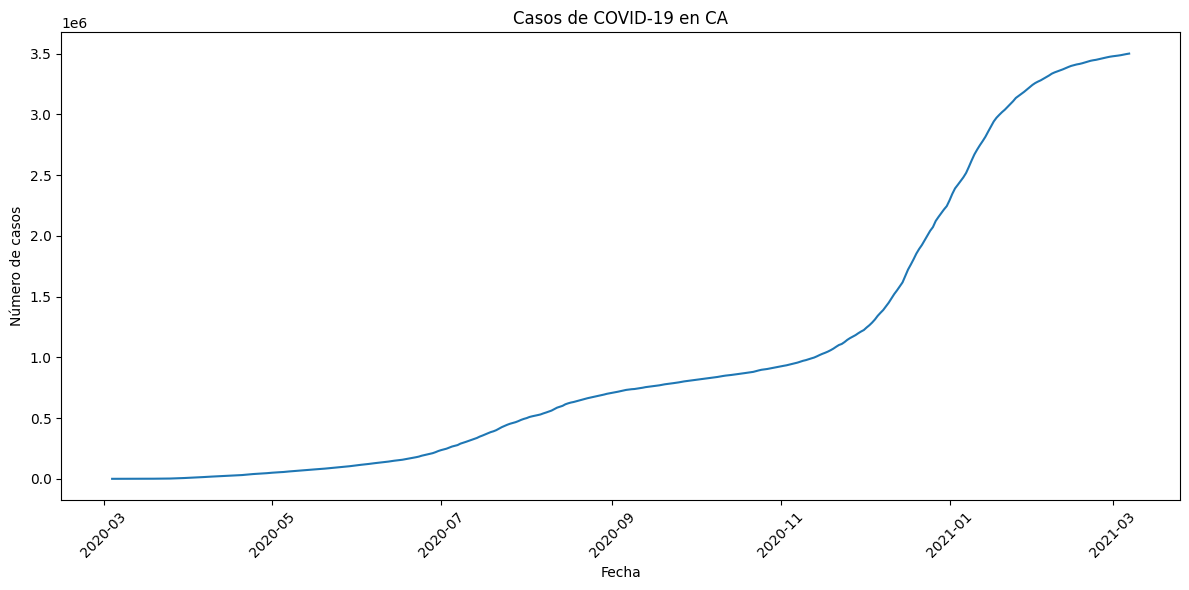

In [25]:
import matplotlib.pyplot as plt

# Graficar casos a lo largo del tiempo para un estado específico
estado = 'CA'  # Por ejemplo, California
df_estado = df[df['state'] == estado]

plt.figure(figsize=(12, 6))
plt.plot(df_estado['date'], df_estado['positive'])
plt.title(f'Casos de COVID-19 en {estado}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular tasa de crecimiento diario de casos
df['tasa_crecimiento'] = df.groupby('state')['positive'].pct_change()

<ipython-input-46-ab92b5829b2e>:2: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



<ipython-input-26-9e4f140fee05>:13: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



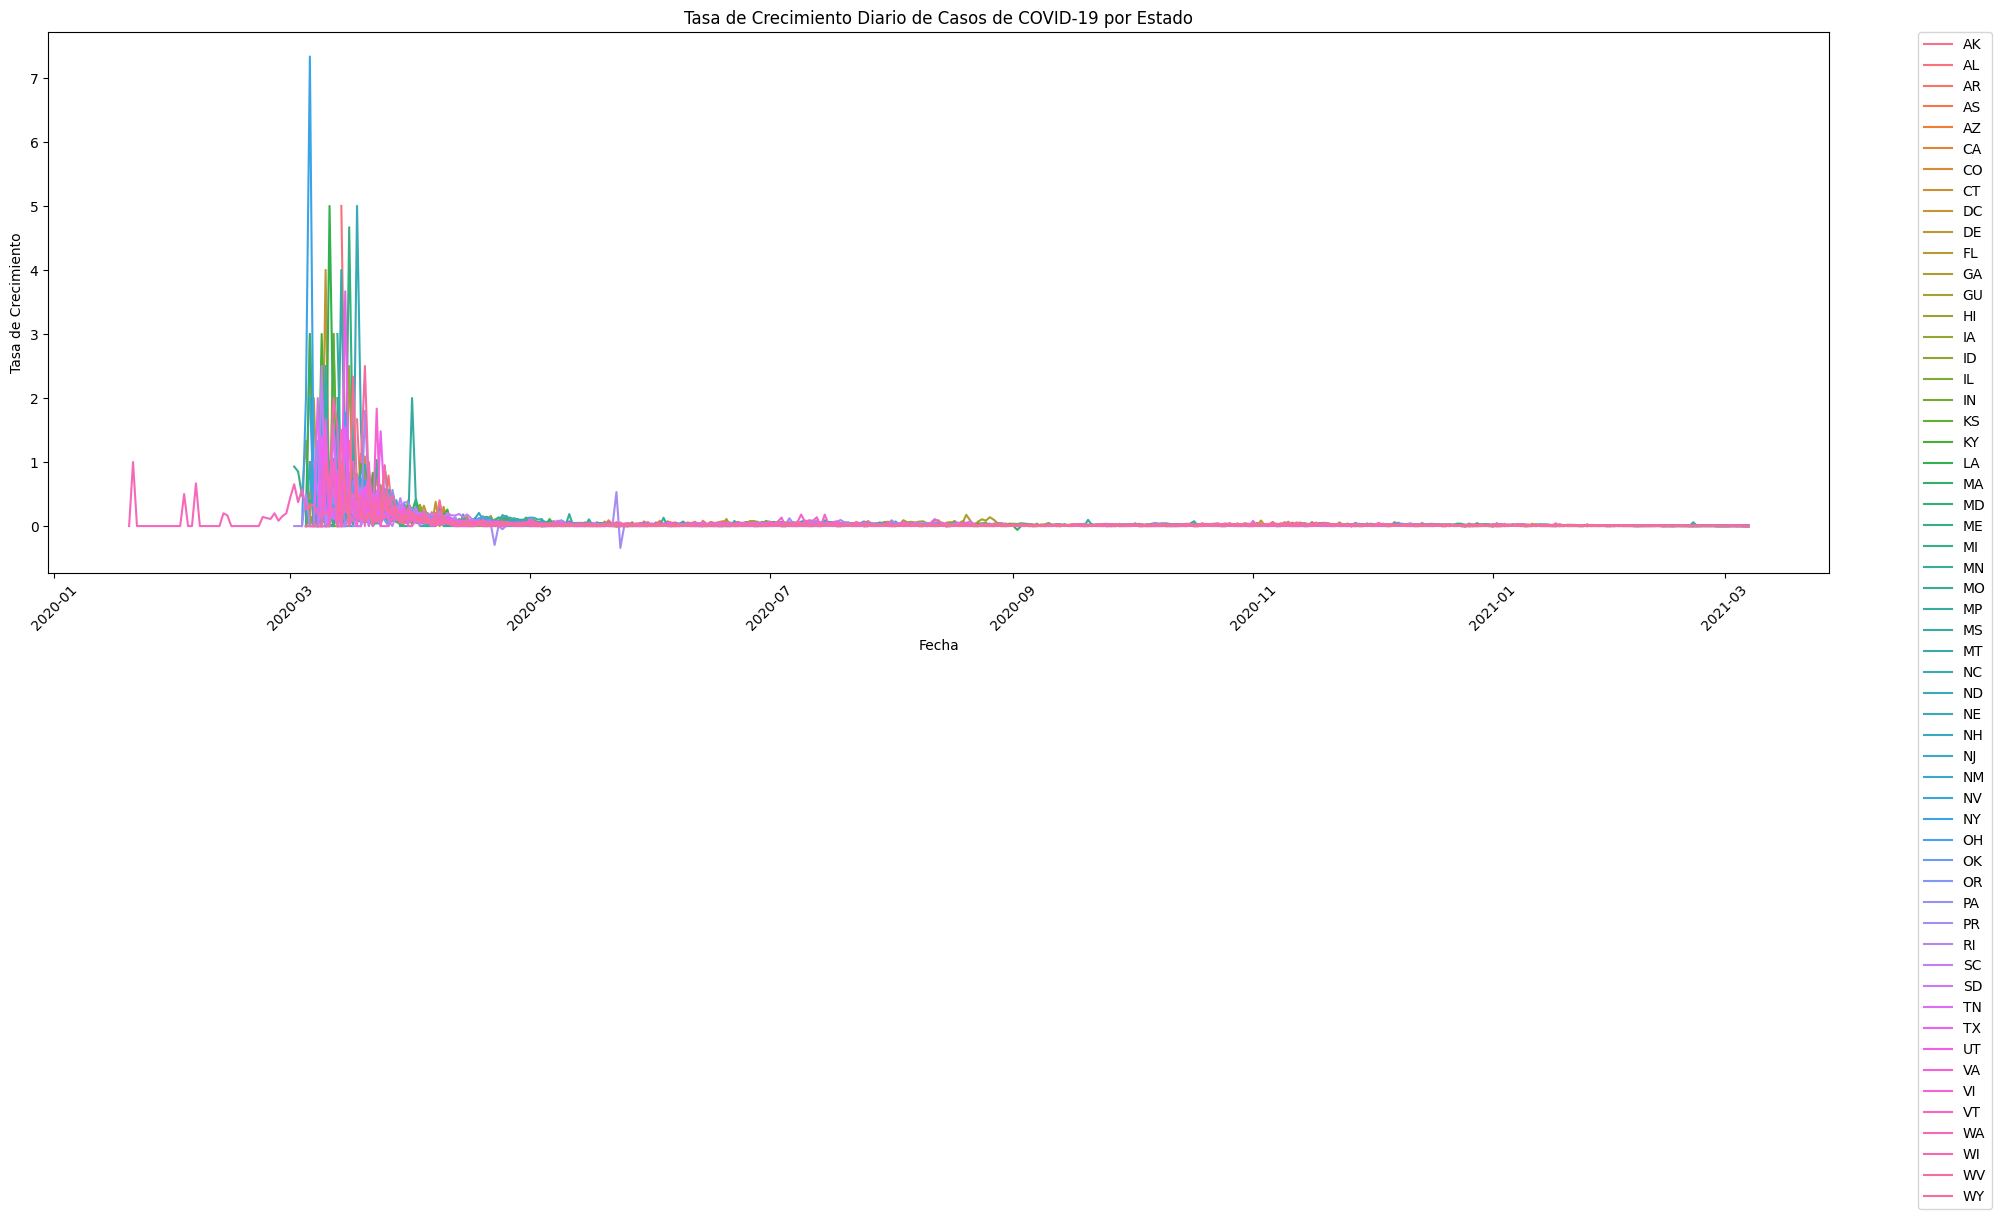

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya has cargado tus datos en el DataFrame 'df'
# y que has convertido la columna de fecha a datetime

# 1. Ordenar el DataFrame por estado y fecha
df = df.sort_values(['state', 'date'])

# 2. Calcular la tasa de crecimiento diario de casos por estado
# Primero, llenamos los valores NA en 'positive' con el método forward fill
df['positive'] = df.groupby('state')['positive'].fillna(method='ffill')

# Luego calculamos la tasa de crecimiento
df['growth_rate'] = df.groupby('state')['positive'].pct_change(fill_method=None)

# 3. Crear el gráfico
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='date', y='growth_rate', hue='state')

plt.title('Tasa de Crecimiento Diario de Casos de COVID-19 por Estado')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Identificación de valores nulos
print(df.isna().sum())


date                     0
state                    0
positive                 0
probableCases        11321
negative              7305
                     ...  
growth_rate            517
año                      0
mes                      0
dia_semana               0
dias_desde_inicio        0
Length: 63, dtype: int64


In [28]:
!pip install geopandas

El código que sigue funciona creando un archivo casos.py con el código dentro) y ejecutando en vsc el comando: bokeh serve --show casos.py

Muestra un mapa de los EE.UU. donde se van acumulando los casos positivos según avanzan los días. Si me da tiempo lo hago con hospitalizaciones y muertes.

Abriendo el html que genera el código, tampoco he conseguido que funcione

In [31]:
import pandas as pd
import geopandas as gpd
from bokeh.io import output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Slider
from bokeh.layouts import column
from bokeh.palettes import Viridis256
import json
from bokeh.models.widgets import Div

# Cargar los datos de COVID-19 desde el archivo JSON
with open('daily.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de pandas
df_covid = pd.DataFrame(data)

# Convertir la columna 'date' a tipo datetime para facilitar la manipulación
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Cargar los datos geográficos de los estados de EE.UU.
states = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
states['state'] = states['id']

# Obtener las fechas únicas en el dataset y ordenarlas
dates = sorted(df_covid['date'].unique())
date_strs = [date.strftime('%Y-%m-%d') for date in dates]

# Crear la función que actualiza el mapa según la fecha seleccionada
def update_plot(attr, old, new):
    date_to_plot = dates[new]
    df_covid_latest = df_covid[df_covid['date'] == date_to_plot]
    merged = states.merge(df_covid_latest, on='state', how='left')

    # Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
    merged['date'] = merged['date'].astype(str)

    # Actualizar el rango de colores
    color_mapper.low = merged['positive'].min()
    color_mapper.high = merged['positive'].max()

    geosource.geojson = merged.to_json()
    p.title.text = f'Casos de COVID-19 por Estado en {date_to_plot.strftime("%Y-%m-%d")}'
    date_display.text = f"Fecha seleccionada: {date_to_plot.strftime('%Y-%m-%d')}"

# Crear GeoJSONDataSource inicial
df_covid_initial = df_covid[df_covid['date'] == dates[0]]
merged = states.merge(df_covid_initial, on='state', how='left')

# Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
merged['date'] = merged['date'].astype(str)

geosource = GeoJSONDataSource(geojson=merged.to_json())

# Crear el mapa inicial
palette = Viridis256[::-1]  # Invertir la paleta para que colores más oscuros representen valores más altos
color_mapper = LinearColorMapper(palette=palette, low=merged['positive'].min(), high=merged['positive'].max())

p = figure(title=f'Casos de COVID-19 por Estado en {dates[0].strftime("%Y-%m-%d")}',
           height=600, width=950,
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs', 'ys', source=geosource,
          fill_color={'field': 'positive', 'transform': color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

# Añadir la barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None, location=(0, 0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Configurar el hover tool
hover = HoverTool(tooltips=[('Estado', '@state'), ('Casos Positivos', '@positive')])
p.add_tools(hover)

# Crear un Slider para seleccionar la fecha
slider = Slider(title="Fecha", start=0, end=len(dates)-1, value=0, step=1)
slider.on_change('value', update_plot)

# Mostrar la fecha seleccionada en un Div
date_display = Div(text=f"Fecha seleccionada: {dates[0].strftime('%Y-%m-%d')}", width=300, height=30)

# Disponer el layout
layout = column(p, slider, date_display)

# Mostrar el mapa
curdoc().add_root(layout)
output_file("covid_us_map.html")
show(layout)



You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html

